In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

In [2]:
sims = ["n2ed1","n2ed2","n2ed3","n2ed4",
        "n2em1","n2em2","n2em3","n2em4",
        "n2en1","n2en2","n2en3","n2en4",
        "n2rd1","n2rd2","n2rd3","n2rd4","n2rd5","n2rd6",
        "n2rn1","n2rn2","n2rn3","n2rn4","n2rn5","n2rn6",
        "n2rm1","n2rm2","n2rm3","n2rm4","n2rm5","n2rm6"]

mg_color = '#00af2b'
h2o_color = '#df0303'
na_color = "blueviolet"

In [5]:
dist_df = []
simulation_dict = {'d':"DESRES","m":"mMg","n":"nMg"}
for sim in sims:
    df = pd.read_csv(f'../../simulations/simulation_distances/{sim}_Mg.csv').groupby('other_atom').min().drop(columns='RNA_atom')
    dists = df.stack().reset_index().rename(columns={0:"distance"})
    dists["atom"] = "Mg²⁺"
    dists["type"] = simulation_dict[sim[3]]
    dists["sim"] = sim
    dist_df.append(dists)
    df = pd.read_csv(f'../../simulations/simulation_distances/{sim}_Na.csv').groupby('other_atom').min().drop(columns='RNA_atom')
    dists = df.stack().reset_index().rename(columns={0:"distance"})
    dists["atom"] = "Na⁺"
    dists["type"] = simulation_dict[sim[3]]
    dists["sim"] = sim
    dist_df.append(dists)
    df = pd.read_csv(f'../../simulations/simulation_distances/{sim}_wat.csv').groupby('other_atom').min().drop(columns='RNA_atom')
    dists = df.stack().reset_index().rename(columns={0:"distance"})
    dists["atom"] = "H₂O"
    dists["type"] = simulation_dict[sim[3]]
    dists["sim"] = sim
    dist_df.append(dists)
dist_df = pd.concat(dist_df)

/tmp/ipykernel_149935/2965295654.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.axes[2][0].set_xticklabels(g.axes[2][0].get_xticklabels(),size=12)


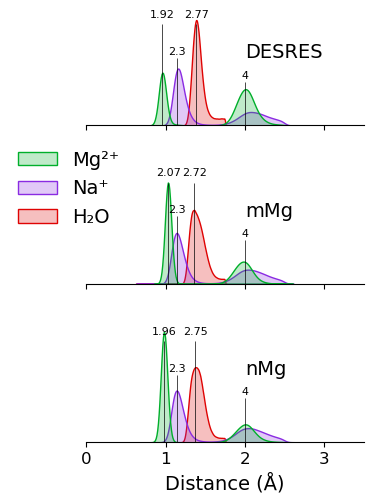

In [7]:
palette = {"Mg²⁺":mg_color,"Na⁺":na_color,"H₂O":h2o_color}
g = sns.displot(dist_df.reset_index(), x="distance",hue="atom",row="type",palette=palette,kind="kde",
               common_norm=False,fill=True,height=1.75,aspect=1.5,row_order=["DESRES","mMg","nMg"])
g.fig.tight_layout()
g.axes[0][0].spines['left'].set_visible(False)
g.axes[1][0].spines['left'].set_visible(False)
g.axes[2][0].spines['left'].set_visible(False)
g.axes[0][0].set_title("")
g.axes[1][0].set_title("")
g.axes[2][0].set_title("")
g.axes[2][0].set_xlabel("Distance (Å)",size=14)
g.axes[2][0].set_xticklabels(g.axes[2][0].get_xticklabels(),size=12)
sns.move_legend(obj = g, loc = 'upper right', frameon = False, bbox_to_anchor = (0.3, 0.7),title='',fontsize=14)

g.axes[0][0].text(4,2,"DESRES",size=14)
g.axes[1][0].text(4,2,"mMg",size=14)
g.axes[2][0].text(4,2,"nMg",size=14)
g.set(yticks=[],ylabel="",xlim=(0,7))


g.axes[0][0].vlines(1.92,0,3,color='black',linewidth=0.5) #r 
g.axes[0][0].text(1.92,3.2,"1.92",size=8,horizontalalignment='center')
g.axes[0][0].vlines(2.77,0,3,color='black',linewidth=0.5) #r
g.axes[0][0].text(2.77,3.2,"2.77",size=8,horizontalalignment='center')

for i in range(3):
    g.axes[i][0].vlines(2.3,0,2,color='black',linewidth=0.5) #r
    g.axes[i][0].text(2.3,2.1,"2.3",size=8,horizontalalignment='center')
    g.axes[i][0].vlines(4,0,1.3,color='black',linewidth=0.5)
    g.axes[i][0].text(4,1.4,"4",size=8,horizontalalignment='center')

g.axes[1][0].vlines(2.07,0,3,color='black',linewidth=0.5) #l
g.axes[1][0].text(2.07,3.2,"2.07",size=8,horizontalalignment='center')
g.axes[1][0].vlines(2.72,0,3,color='black',linewidth=0.5)
g.axes[1][0].text(2.72,3.2,"2.72",size=8,horizontalalignment='center')

g.axes[2][0].vlines(1.96,0,3,color='black',linewidth=0.5) #r
g.axes[2][0].text(1.96,3.2,"1.96",size=8,horizontalalignment='center')
g.axes[2][0].vlines(2.75,0,3,color='black',linewidth=0.5)
g.axes[2][0].text(2.75,3.2,"2.75",size=8,horizontalalignment='center')
    #for x in range(10,60):
    #    ax.axvline(x/10,alpha=0.3,color='grey',linewidth=0.5)
    #    for i in range(5):
    #        ax.axvline((x/10)+(0.01*i),alpha=0.3,color='grey',linewidth=0.2)

plt.savefig("MD_solvent_dist.png",dpi=400, bbox_inches="tight",transparent=True)
plt.savefig("MD_solvent_dist.svg", bbox_inches="tight",transparent=True)

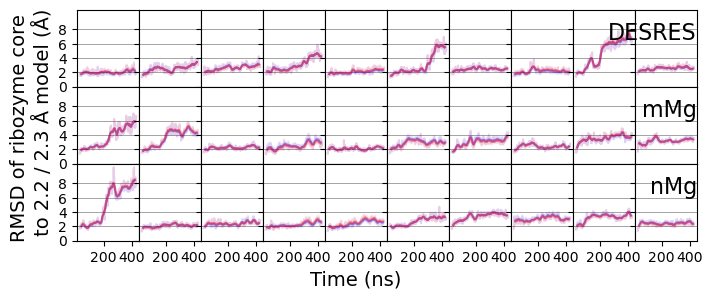

In [10]:
fig, axs = plt.subplots(3,10,figsize=(8,3),sharex=True,sharey=True)
sims = ["n2rd1","n2rd2","n2rd3","n2rd4","n2rd5","n2rd6","n2ed1","n2ed2","n2ed3","n2ed4",
        "n2rm1","n2rm2","n2rm3","n2rm4","n2rm5","n2rm6","n2em1","n2em2","n2em3","n2em4",
        "n2rn1","n2rn2","n2rn3","n2rn4","n2rn5","n2rn6","n2en1","n2en2","n2en3","n2en4", ]
df = pd.read_csv('22_23_core_rmsds.csv')
dataframes = []
for sim in sims:
    dataframes.append(df[df.simulation==sim])
for i,data in enumerate(dataframes):
    sns.lineplot(data=data,x="Time (ns)",y="RMSD (Å)",alpha=0.1,color="blue",ax=axs[i//10,i%10])
    sns.lineplot(data=data,x="Time (ns)",y="rmsd22_20avg",alpha=0.4,color="blue",ax=axs[i//10,i%10])
    sns.lineplot(data=data,x="Time (ns)",y="rmsd23",alpha=0.1,color="red",ax=axs[i//10,i%10])
    sns.lineplot(data=data,x="Time (ns)",y="rmsd23_20avg",alpha=0.4,color="red",ax=axs[i//10,i%10])
    axs[i//10,i%10].set_yticks([0,2,4,6,8])
    axs[i//10,i%10].yaxis.grid(which='both', linestyle='-', linewidth='0.5',color="grey")
    # 20 sliding average
    
plt.subplots_adjust( hspace=0,wspace=0)
axs[0,0].set_ylabel("")
axs[1,0].yaxis.label.set_size(14)
axs[2,0].set_ylabel("")
axs[2,0].set_xlabel("")
axs[2,1].set_xlabel("")
axs[2,2].set_xlabel("")
axs[2,3].set_xlabel("")
axs[2,4].xaxis.label.set_size(14)
axs[2,5].set_xlabel("")
axs[2,6].set_xlabel("")
axs[2,7].set_xlabel("")
axs[2,8].set_xlabel("")
axs[2,9].set_xlabel("")
axs[0,0].tick_params(axis='y',labelsize=10)
axs[1,0].tick_params(axis='y',labelsize=10)
axs[2,0].tick_params(axis='y',labelsize=10)
axs[2,0].tick_params(axis='x',labelsize=10)
axs[2,1].tick_params(axis='x',labelsize=10)
axs[2,2].tick_params(axis='x',labelsize=10)
axs[2,3].tick_params(axis='x',labelsize=10)
axs[2,4].tick_params(axis='x',labelsize=10)
axs[2,5].tick_params(axis='x',labelsize=10)
axs[2,6].tick_params(axis='x',labelsize=10)
axs[2,7].tick_params(axis='x',labelsize=10)
axs[2,8].tick_params(axis='x',labelsize=10)
axs[2,9].tick_params(axis='x',labelsize=10)
axs[0,9].set_title("DESRES",loc="right",y=0.5,fontdict={"fontsize":16})
axs[1,9].set_title("mMg",loc="right",y=0.5,fontdict={"fontsize":16})
axs[2,9].set_title("nMg",loc="right",y=0.5,fontdict={"fontsize":16})


t=axs[1,0].set_ylabel("RMSD of ribozyme core \n to 2.2 / 2.3 Å model (Å)")
plt.savefig("MD_RMSD.png",dpi=400, bbox_inches="tight",transparent=True)
plt.savefig("MD_RMSD.svg", bbox_inches="tight",transparent=True)